<a href="https://colab.research.google.com/github/Laureoby/fetal_health_dataset/blob/main/Fetal_health_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('/content/drive/MyDrive/fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [7]:
data.duplicated().sum()

13

In [8]:
# prompt: delete duplicated values in dataset
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [9]:
data['fetal_health'].value_counts()

fetal_health
1.0    1646
2.0     292
3.0     175
Name: count, dtype: int64

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

    Normal
    Suspect
    Pathological


**data visualization and user stories**

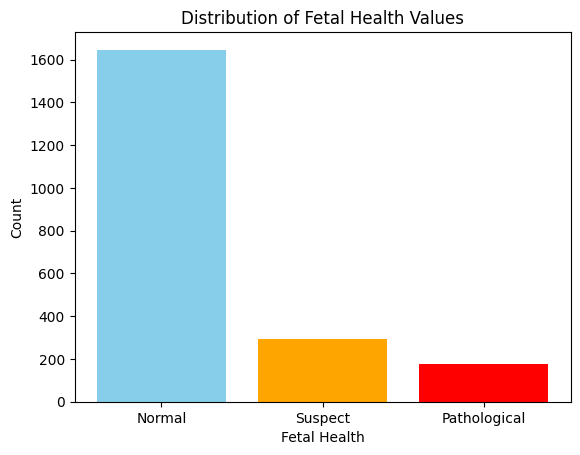

In [10]:
# prompt: génère moi un diagramme en barre pour voir la répartition des valeurs de la colonne fetal_health avec les labels suivants; 1 pour Normal, 2 pour Suspect et 3 pour Pathological, propose des couleurs différentes pour chaque valeur
fetal_health_counts = data['fetal_health'].value_counts()

labels = ['Normal', 'Suspect', 'Pathological']
colors = ['skyblue', 'orange', 'red']

plt.bar(labels, fetal_health_counts, color=colors)
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.title('Distribution of Fetal Health Values')
plt.show()


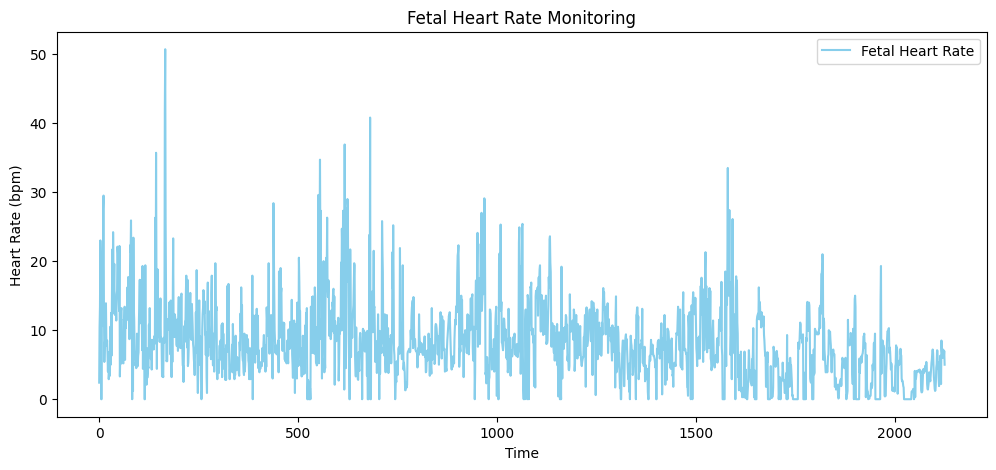

<ipython-input-11-0116b66a42d5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=accelerations, palette='viridis')


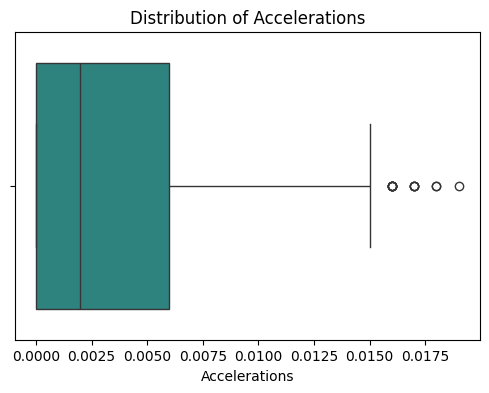

<ipython-input-11-0116b66a42d5>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=decelerations, palette='viridis')


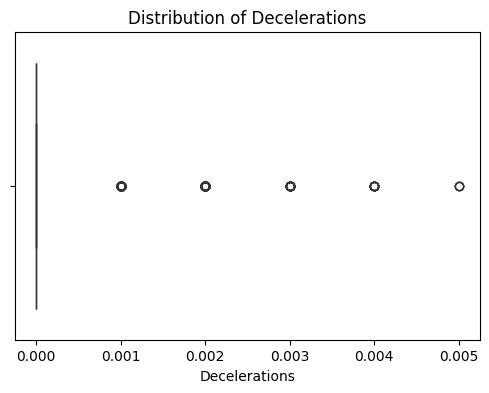

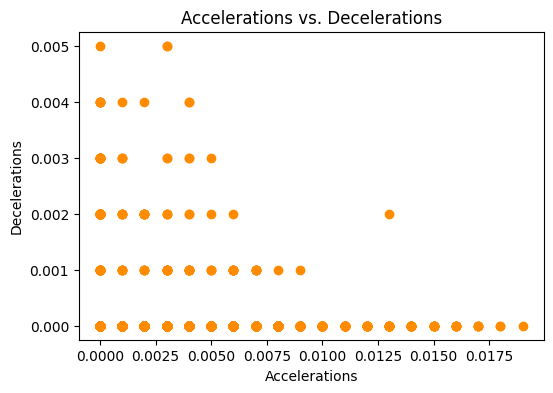

In [11]:
# prompt: I want to create visualizations showing trends and outliers in fetal heart monitoring data, such as accelerations and decelerations, to assist healthcare professionals in quickly identifying unusual cases that may require further investigation or immediate action.
# Extracting relevant features for visualization
fetal_heart_rate = data['mean_value_of_long_term_variability']
accelerations = data['accelerations']
decelerations = data['prolongued_decelerations']

# Plotting fetal heart rate over time
plt.figure(figsize=(12, 5))
plt.plot(fetal_heart_rate, color='skyblue', label='Fetal Heart Rate')
plt.xlabel('Time')
plt.ylabel('Heart Rate (bpm)')
plt.title('Fetal Heart Rate Monitoring')
plt.legend()
plt.show()

# Boxplot to visualize distribution of accelerations
plt.figure(figsize=(6, 4))
sns.boxplot(x=accelerations, palette='viridis')
plt.xlabel('Accelerations')
plt.title('Distribution of Accelerations')
plt.show()

# Boxplot to visualize distribution of decelerations
plt.figure(figsize=(6, 4))
sns.boxplot(x=decelerations, palette='viridis')
plt.xlabel('Decelerations')
plt.title('Distribution of Decelerations')
plt.show()

# Scatter plot to identify outliers in accelerations vs. decelerations
plt.figure(figsize=(6, 4))
plt.scatter(accelerations, decelerations, color='darkorange')
plt.xlabel('Accelerations')
plt.ylabel('Decelerations')
plt.title('Accelerations vs. Decelerations')
plt.show()


I want to analyze the relationship between baseline fetal heart rate and fetal health, so that I can better understand how variations in heart rate correlate with overall fetal well-being and develop more precise guidelines for monitoring during pregnancy.

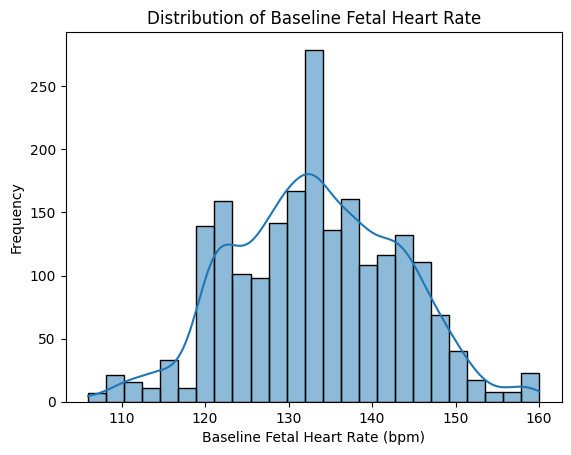

In [14]:
sns.histplot(data['baseline value'], kde=True)
plt.title('Distribution of Baseline Fetal Heart Rate')
plt.xlabel('Baseline Fetal Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

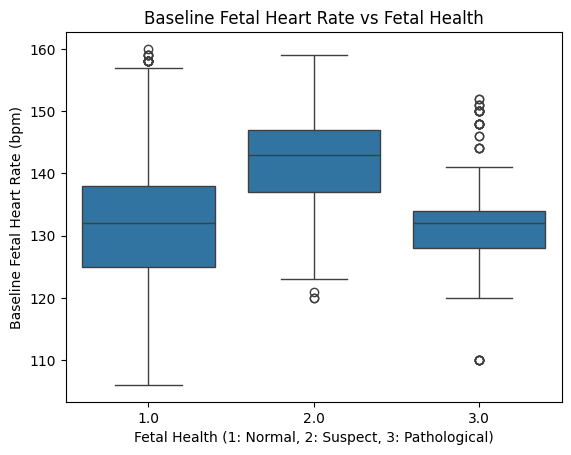

In [15]:
# Analyze the relationship between baseline fetal heart rate and fetal health
sns.boxplot(x='fetal_health', y='baseline value', data=data)
plt.title('Baseline Fetal Heart Rate vs Fetal Health')
plt.xlabel('Fetal Health (1: Normal, 2: Suspect, 3: Pathological)')
plt.ylabel('Baseline Fetal Heart Rate (bpm)')
plt.show()

In [16]:
# For a quantitative measure, calculate the correlation coefficient
correlation = data[['baseline value', 'fetal_health']].corr()
print("Correlation coefficient:")
print(correlation)

Correlation coefficient:
                baseline value  fetal_health
baseline value        1.000000      0.146077
fetal_health          0.146077      1.000000


In [17]:
# Advanced: Use logistic regression to model the probability of fetal health status based on baseline heart rate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Assuming fetal_health is a categorical variable with classes 1, 2, 3
X = data[['baseline value']]  # Predictor
y = data['fetal_health']      # Response

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Evaluation:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Evaluation:
              precision    recall  f1-score   support

         1.0       0.78      0.98      0.87       497
         2.0       0.27      0.03      0.06        90
         3.0       0.00      0.00      0.00        47

    accuracy                           0.78       634
   macro avg       0.35      0.34      0.31       634
weighted avg       0.65      0.78      0.69       634

Confusion Matrix:
[[489   8   0]
 [ 87   3   0]
 [ 47   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
